#PROGRAM NO-1


---


#AIM: Programs on feedforward network to classify any standard dataset available in the public domain.
DATASET: mnist dataset

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt


In [ ]:
(x_train,y_train),(x_valid,y_valid)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

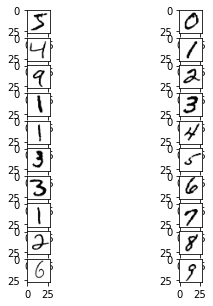

In [ ]:
plt.figure(figsize=(5,5))
for k in range(20):
  plt.subplot(10,2,k+1)
  plt.imshow(x_train[k],cmap='Greys')
  plt.axis('on')
plt.show()

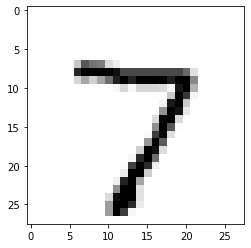

In [ ]:
plt.imshow(x_valid[0],cmap='Greys')

PREPROCESS DATA

In [ ]:
x_train=x_train.reshape(60000,784).astype('float32')
x_valid=x_valid.reshape(10000,784).astype('float32')


In [ ]:
x_train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [ ]:
x_train/=255

In [ ]:
x_valid/=255

In [ ]:
from keras import utils as np_utils
n_classes = 10
y_train=keras.utils.np_utils.to_categorical(y_train,n_classes)
y_valid=keras.utils.np_utils.to_categorical(y_valid,n_classes)

In [ ]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
model=Sequential()

In [ ]:
model.add(Dense(64,activation='sigmoid',input_shape=(784,)))

In [ ]:
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(64*784)

50176

In [ ]:
model.compile(loss='mean_squared_error',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])

In [ ]:
history=model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=1)

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0928 - accuracy: 0.0947
Epoch 2/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0912 - accuracy: 0.0837
Epoch 3/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0903 - accuracy: 0.1282
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0897 - accuracy: 0.1749
Epoch 5/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0892 - accuracy: 0.2094
Epoch 6/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0887 - accuracy: 0.2317
Epoch 7/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0883 - accuracy: 0.2447
Epoch 8/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0879 - accuracy: 0.2541
Epoch 9/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0875 - accuracy: 0.2632
Epoch 10/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0872 - accura

In [ ]:
import numpy as np

dict_keys(['loss', 'accuracy'])


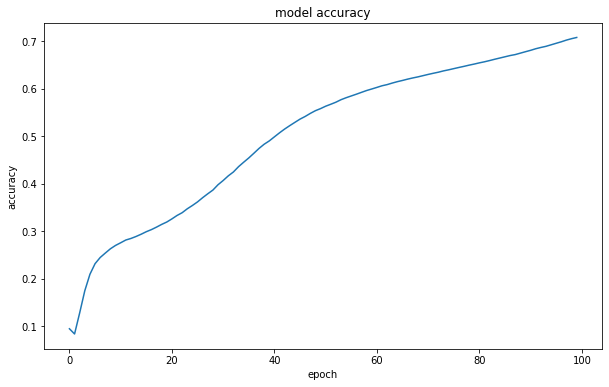

In [ ]:
plt.figure(figsize=(10,6))
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

